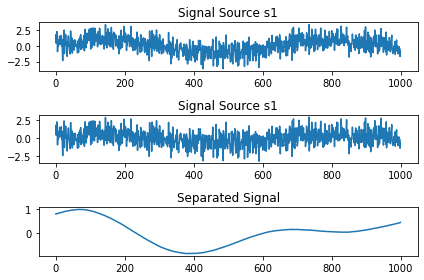

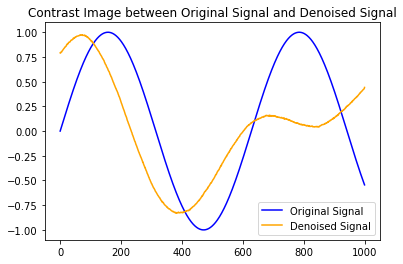

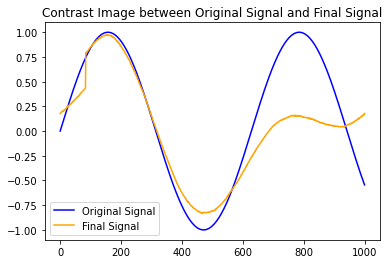

NRMSE between original signal and final signal: 0.18861528220556736


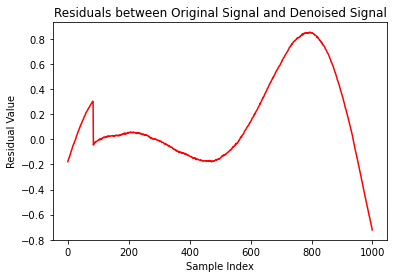

In [3]:
import numpy as np
from scipy.linalg import hankel
import matplotlib.pyplot as plt

# 生成待处理信号
np.random.seed(0)
time = np.linspace(0, 5, 1000)
signal = np.sin(2 * time)  # 信号源
noise = np.random.normal(size=signal.shape)  # 噪声
s1 = signal + noise
s2 = 0.5 * signal + noise
S = np.c_[s1, s2]

# 将信号数组转换为汉克尔矩阵
hankel_matrix = hankel(S[:, 0], S[:, 1])

# 进行奇异值分解
U, sigma, Vt = np.linalg.svd(hankel_matrix, full_matrices=False)

# 选择保留的主要成分数量
num_components = 1
U_truncated = U[:, :num_components]
sigma_truncated = np.diag(sigma[:num_components])
Vt_truncated = Vt[:num_components, :]

# 重构降噪后的信号
denoised_signal_matrix = np.dot(U_truncated, np.dot(sigma_truncated, Vt_truncated))

# 绘制混合信号和分离信号
plt.figure(1)

plt.subplot(3,1,1)
plt.title('Signal Source s1')
plt.plot(s1)

plt.subplot(3,1,2)
plt.title('Signal Source s1')
plt.plot(s2)

plt.subplot(3,1,3)
plt.title('Separated Signal')
plt.plot(denoised_signal_matrix[:, 0])

plt.tight_layout()

# 绘制原始信号和处理后信号的对比
plt.figure(2)
plt.plot(signal, label='Original Signal', color='blue')
plt.plot(denoised_signal_matrix[:, 0], label='Denoised Signal', color='orange')
plt.title('Contrast Image between Original Signal and Denoised Signal')
plt.legend()

# 发现降噪后的信号相位有问题，可对降噪后的信号进行处理
plt.figure(3)
S_final = np.roll(denoised_signal_matrix[:, 0], 84)
plt.plot(signal, label='Original Signal', color='blue')
plt.plot(S_final, label='Final Signal', color='orange')
plt.title('Contrast Image between Original Signal and Final Signal')
plt.legend()

plt.show()

# 标准化均方根误差(NRMSE)函数
def calculate_nrmse(original_signal, denoised_signal):
    rmse = np.sqrt(np.mean((original_signal - denoised_signal)**2))
    signal_range = np.max(original_signal) - np.min(original_signal)
    nrmse = rmse / signal_range
    return nrmse

# 计算原始信号和最终信号的 NRMSE
nrmse_value_final = calculate_nrmse(signal, S_final)
print(f"NRMSE between original signal and final signal: {nrmse_value_final}")

# 计算最终信号和原始信号之间的残差
residuals = signal - S_final

# 绘制残差图
plt.figure(4)
plt.plot(residuals, color='red')
plt.title('Residuals between Original Signal and Denoised Signal')
plt.xlabel('Sample Index')
plt.ylabel('Residual Value')
plt.show()


